In [8]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import numpy as np
from mytools.tools import *
from urllib.request import urlopen
import cv2

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

In [2]:
config_file = './checkpoints/SETR_Naive_ReLeM/SETR_Naive_768x768_80k_base.py'
checkpoint_file = './checkpoints/SETR_Naive_ReLeM/iter_80000.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/home/dima/FoodSeg103-Benchmark-v1/mmseg/models/builder.py:59: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  warnings.warn(


load pre-trained weight from imagenet21k


In [4]:
# test a single image

In [4]:
url = 'https://image.shutterstock.com/z/stock-photo-green-salad-with-baked-chicken-breast-at-white-kitchen-table-healthy-food-clean-eating-concept-1932518612.jpg'


In [9]:
img = url_to_image(url)

/home/dima/FoodSeg103-Benchmark-v1/mmseg/models/segmentors/base.py:267: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


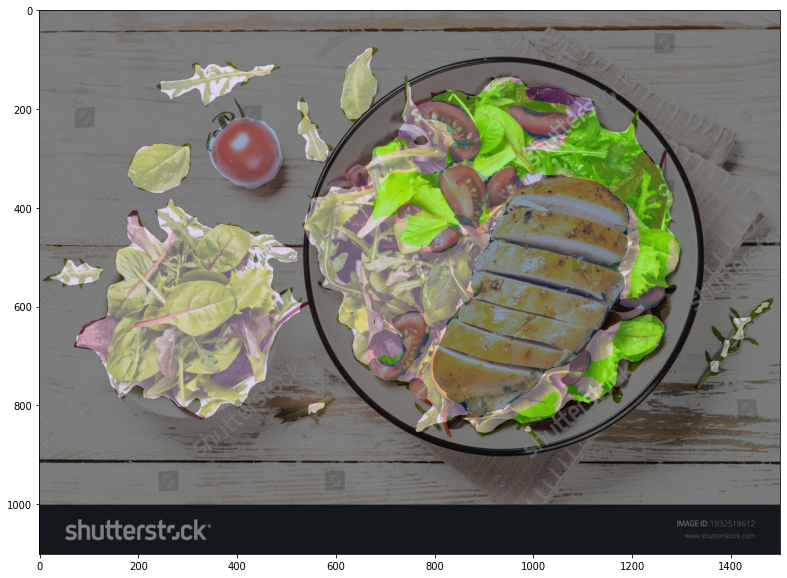

In [10]:

result = inference_segmentor(model, img)
show_result_pyplot(model, img, result, )

In [11]:
result_ = result[0]
np.unique(result_)

array([ 0, 48, 73, 80, 89, 91, 93])

In [12]:
from PIL import Image

In [19]:
bool_mask = np.uint8(np.where(result_==89,255,0))

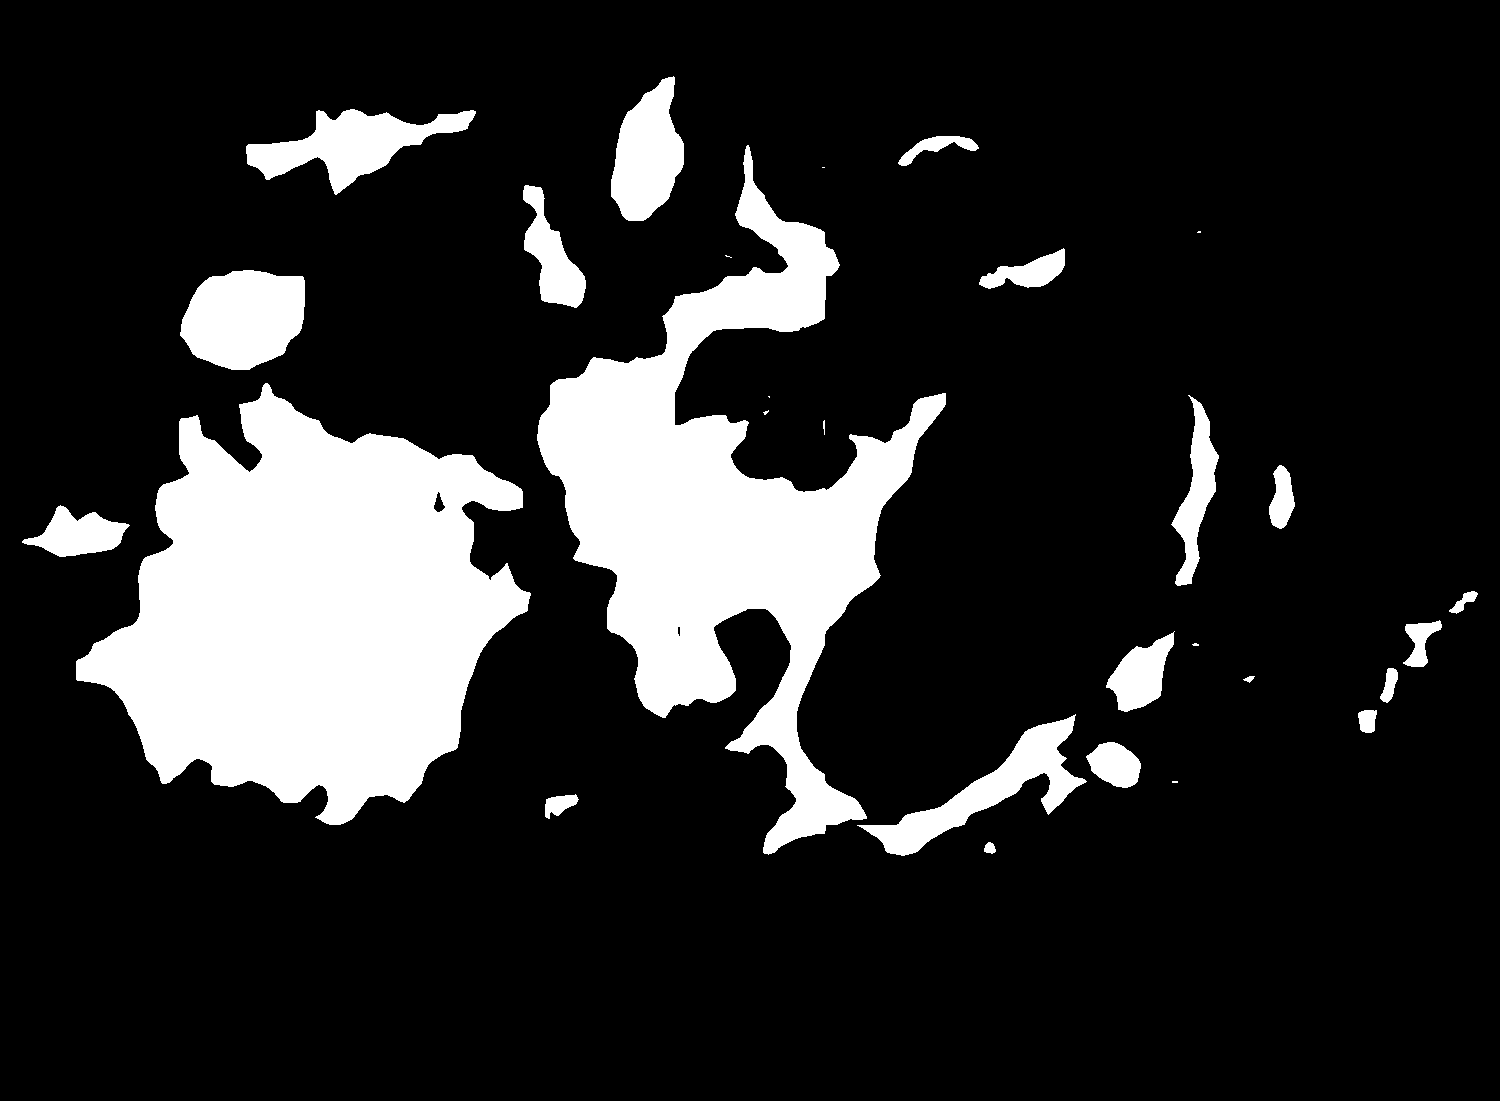

In [20]:
Image.fromarray(bool_mask)

In [ ]:
show_result_pyplot(model, img, [np.where(result_==10,1,0)] )

In [24]:
show_result_pyplot?

Signature: show_result_pyplot(model, img, result, palette=None, fig_size=(15, 10))
Docstring:
Visualize the segmentation results on the image.

Args:
    model (nn.Module): The loaded segmentor.
    img (str or np.ndarray): Image filename or loaded image.
    result (list): The segmentation result.
    palette (list[list[int]]] | None): The palette of segmentation
        map. If None is given, random palette will be generated.
        Default: None
    fig_size (tuple): Figure size of the pyplot figure.
File:      ~/FoodSeg103-Benchmark-v1/mmseg/apis/inference.py
Type:      function


In [45]:
[np.where(result_==10,1,0)]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]